In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_excel(r'C:\Users\Nikhil\Documents\Participants_Data_Final\Data_Train.xlsx')

In [3]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
#checking for categorical attributes
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

In [6]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

TITLE
QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
BAR,CLUB                       1
DESSERT PARLOR,KIOSK           1
BEVERAGE SHOP,FOOD COURT       1
CLUB,MICROBREWERY              1
QUICK BITES,BAR                1
Name: TITLE, Length: 113, dtype: int64

CUISINES
South Indian                                                    532
North Indian                                                    526
North Indian, Chinese                                           501
Fast Food                                                       286
Chinese                                                         167
                                                               ... 
Bengali, Mughlai                                                  1
Fast Food, Continental, Italian, Beverages, Burger, Desserts      1
Mughlai, North Indian, Chinese, Arabia

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
df=df.fillna(method='ffill')

In [9]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [10]:
# Extract relevant title
df["TITLE"]=df["TITLE"].str.split(",")
TITLE ={}
for x in df["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in TITLE:
            TITLE[each]+=1
        else:
            TITLE[each]=1

In [11]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,[CASUAL DINING],9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"[CASUAL DINING, BAR]",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,[CASUAL DINING],10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,[QUICK BITES],6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,[DESSERT PARLOR],15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"[CASUAL DINING, BAR]",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,[LOUNGE],11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,[CASUAL DINING],6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [12]:
most_qua = sorted(TITLE.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["TITLE"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("TITLE",axis=1,inplace=True)

In [13]:
# Extract relevant CUISINES
df["CUISINES"]=df["CUISINES"].str.split(",")
CUISINES ={}
for x in df["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in CUISINES:
            CUISINES[each]+=1
        else:
            CUISINES[each]=1

In [14]:
most_qua = sorted(CUISINES.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["CUISINES"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("CUISINES",axis=1,inplace=True)

In [15]:
df

,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,None,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,0,1,0,...,1,1,0,0,0,1,0,0,0,0
3,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12686,9686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12687,11133,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12688,6134,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,0,1,0,...,1,1,1,0,0,0,0,0,0,0


In [16]:
df.drop("TIME",axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['CITY','LOCALITY']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [18]:
# Extract years of experience
df["VOTES"] = df["VOTES"].str.split()

In [19]:
df["VOTES"] = df["VOTES"].str[0].astype("int")

In [20]:
df['RATING']=pd.to_numeric(df['RATING'],errors='coerce')

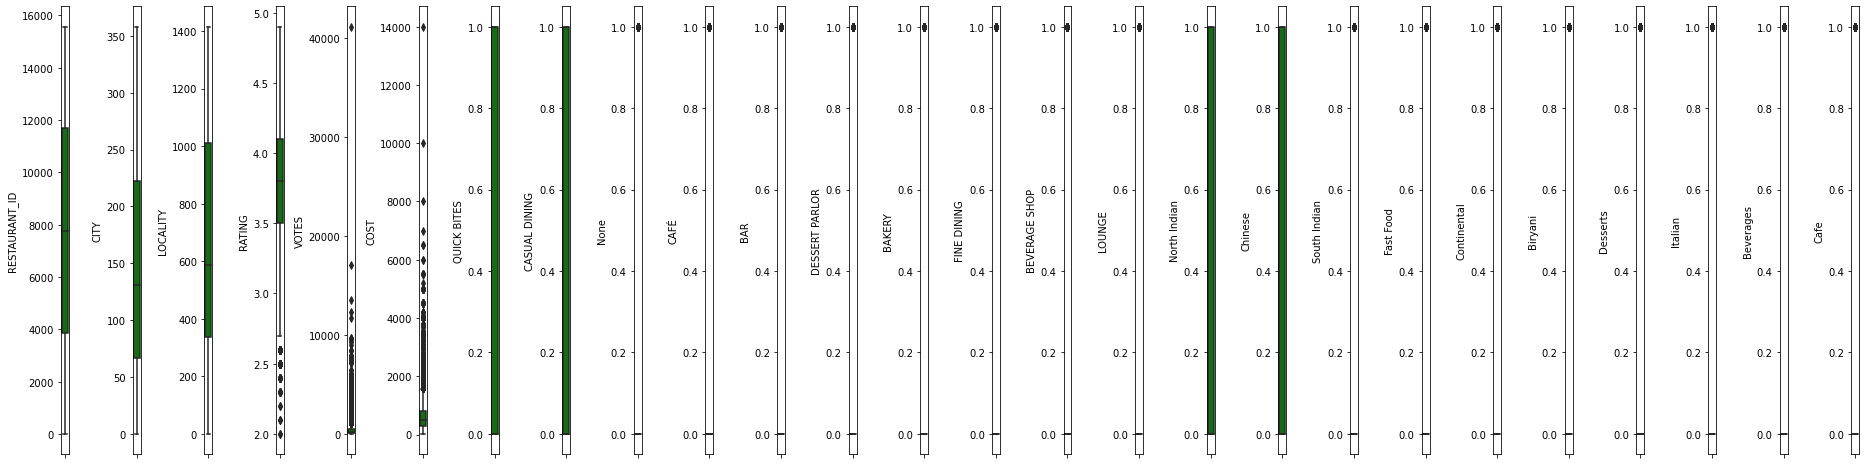

In [21]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [22]:
df.skew()

RESTAURANT_ID      0.006947
CITY               0.249769
LOCALITY           0.336859
RATING            -0.511199
VOTES             13.780079
COST               3.978801
QUICK BITES        0.572878
CASUAL DINING      0.651855
None               3.120924
CAFÉ               3.482442
BAR                3.958224
DESSERT PARLOR     4.201886
BAKERY             4.571879
FINE DINING        5.699442
BEVERAGE SHOP      6.927858
LOUNGE             7.756587
North Indian       0.306814
Chinese            0.655893
South Indian       1.673157
Fast Food          1.784506
Continental        2.293625
Biryani            2.680180
Desserts           2.859109
Italian            2.860783
Beverages          3.194990
Cafe               3.515972
dtype: float64

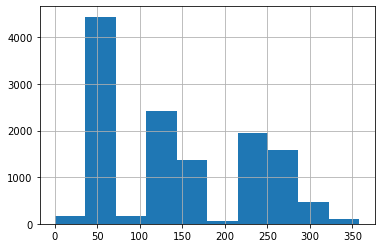

In [23]:
df['CITY'].hist()

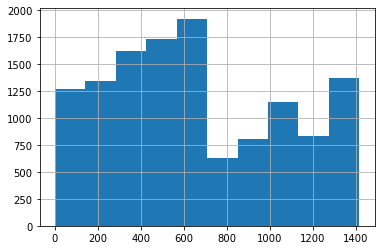

In [24]:
df['LOCALITY'].hist()

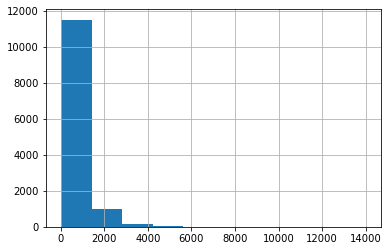

In [25]:
df['COST'].hist()

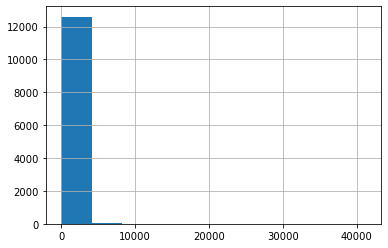

In [26]:
df['VOTES'].hist()

In [27]:
df.isnull().sum()

RESTAURANT_ID        0
CITY                 0
LOCALITY             0
RATING            1203
VOTES                0
COST                 0
QUICK BITES          0
CASUAL DINING        0
None                 0
CAFÉ                 0
BAR                  0
DESSERT PARLOR       0
BAKERY               0
FINE DINING          0
BEVERAGE SHOP        0
LOUNGE               0
North Indian         0
Chinese              0
South Indian         0
Fast Food            0
Continental          0
Biryani              0
Desserts             0
Italian              0
Beverages            0
Cafe                 0
dtype: int64

In [28]:
df=df.fillna(method='ffill')

In [29]:
df.dtypes

RESTAURANT_ID       int64
CITY                int32
LOCALITY            int32
RATING            float64
VOTES               int32
COST                int64
QUICK BITES         int64
CASUAL DINING       int64
None                int64
CAFÉ                int64
BAR                 int64
DESSERT PARLOR      int64
BAKERY              int64
FINE DINING         int64
BEVERAGE SHOP       int64
LOUNGE              int64
North Indian        int64
Chinese             int64
South Indian        int64
Fast Food           int64
Continental         int64
Biryani             int64
Desserts            int64
Italian             int64
Beverages           int64
Cafe                int64
dtype: object

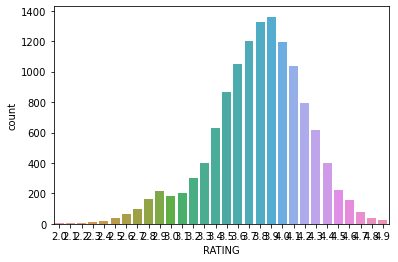

In [30]:
sns.countplot(df['RATING'])

In [31]:
df.corr()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,None,CAFÉ,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
RESTAURANT_ID,1.000000,0.004605,-0.004553,0.032599,-0.001059,0.040710,-0.015348,0.024314,0.007443,-0.016390,...,0.025943,0.027193,0.031500,-0.007477,0.030196,-0.042500,-0.008484,0.011286,0.007434,-0.019538
CITY,0.004605,1.000000,0.038665,0.055810,0.050941,0.042248,-0.035580,0.014703,0.069627,-0.013342,...,0.020175,0.030289,-0.105663,0.066231,0.001789,-0.110033,-0.004619,0.057739,-0.009244,-0.020320
LOCALITY,-0.004553,0.038665,1.000000,-0.024502,-0.028930,-0.016347,0.022109,-0.019463,0.021703,-0.023964,...,0.039428,0.019847,0.022913,0.020914,-0.022928,0.011815,-0.037454,-0.022190,-0.021245,-0.018046
RATING,0.032599,0.055810,-0.024502,1.000000,0.352463,0.307365,-0.210037,0.077414,0.010930,0.123495,...,-0.062121,-0.103220,-0.143301,-0.049238,0.189484,-0.106272,0.082462,0.177496,0.046510,0.120164
VOTES,-0.001059,0.050941,-0.028930,0.352463,1.000000,0.235976,-0.149658,0.166469,-0.054566,0.046181,...,0.062728,0.006117,-0.063154,-0.054357,0.139306,0.022658,-0.017206,0.140334,-0.035883,0.044087
COST,0.040710,0.042248,-0.016347,0.307365,0.235976,1.000000,-0.369266,0.242909,-0.111998,0.022066,...,0.124024,0.039691,-0.103042,-0.170866,0.327636,-0.070543,-0.094476,0.263443,-0.091469,0.020761
QUICK BITES,-0.015348,-0.035580,0.022109,-0.210037,-0.149658,-0.369266,1.000000,-0.545784,-0.220829,-0.182646,...,-0.072459,-0.052680,0.075686,0.244524,-0.216170,0.046850,-0.119105,-0.154993,-0.005175,-0.175542
CASUAL DINING,0.024314,0.014703,-0.019463,0.077414,0.166469,0.242909,-0.545784,1.000000,-0.212647,-0.133057,...,0.289942,0.283550,0.099107,-0.200773,0.171320,0.066075,-0.151787,0.108705,-0.112262,-0.126991
None,0.007443,0.069627,0.021703,0.010930,-0.054566,-0.111998,-0.220829,-0.212647,1.000000,-0.078146,...,0.009772,-0.026583,-0.055392,0.033943,-0.044027,0.035562,-0.038294,-0.031092,-0.011482,-0.075136
CAFÉ,-0.016390,-0.013342,-0.023964,0.123495,0.046181,0.022066,-0.182646,-0.133057,-0.078146,1.000000,...,-0.172613,-0.133316,-0.108137,0.001782,0.133042,-0.083276,0.088178,0.178851,0.096320,0.948200


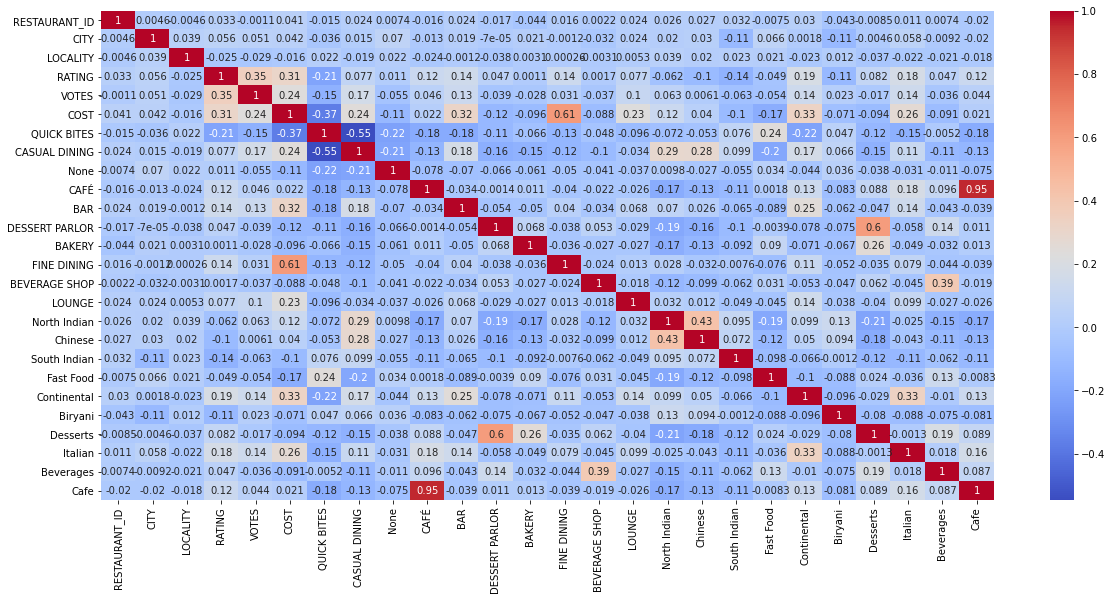

In [32]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [33]:
df.drop("LOCALITY",axis=1,inplace=True)

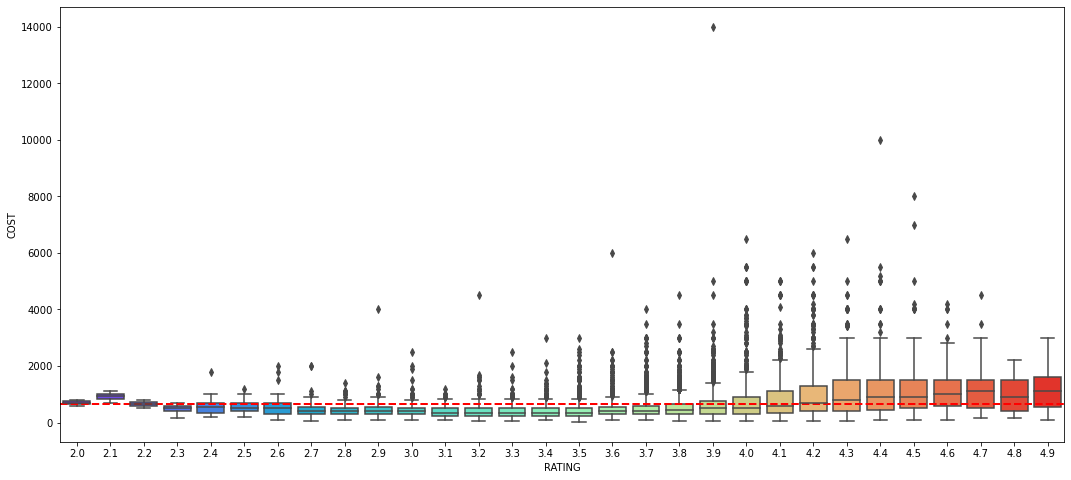

In [34]:
plt.figure(figsize=(18,8))
mean_price=np.mean(df['COST'])
sns.boxplot(y='COST',x='RATING',data=df,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.show()

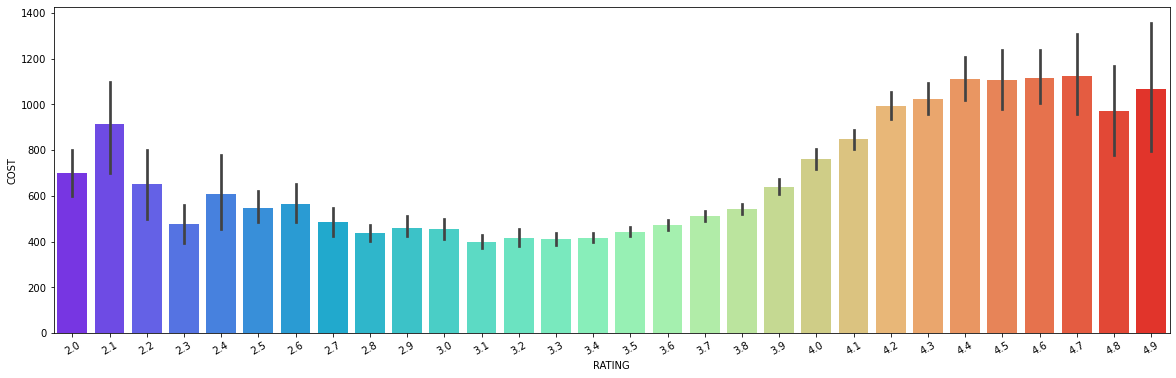

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(y='COST',x='RATING',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

In [36]:
x = df.drop("COST",axis=1)
y = df["COST"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [39]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(x_train),y_train)

SVR()

In [40]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(x_test))
score(y_pred,y_test)

0.7605441444882421

In [41]:
#importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [42]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.6586167177829236
MAE: 89971.38728754585
MSE: 10692560333.014532
RMSE: 103404.83708712341
R2_score: -23919.666289623226
*************************************************************************


Score of SVR() is: 0.16145376404256584
MAE: 384.433224854786
MSE: 453206.29709831835
RMSE: 673.2059841521898
R2_score: -0.013882199922862881
*************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 550.6698187549251
MSE: 567023.0102442869
RMSE: 753.0093028935877
R2_score: -0.2685051834322685
*************************************************************************


Score of KNeighborsRegressor() is: 0.7881385303954298
MAE: 806.4026792750198
MSE: 896009.4168636722
RMSE: 946.5777394718683
R2_score: -1.0044911214555854
*************************************************************************


Score of Lasso() is: 0.658520529851846
MAE: 82461.68064922791
MSE: 9038674075.347523
RMSE: 95071.9415776680

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
rf=RandomForestRegressor()

In [44]:
import joblib

In [46]:
joblib.dump(RandomForestRegressor(),'restaurant_fee.pkl')

['restaurant_fee.pkl']